<a href="https://colab.research.google.com/github/Rellik-7/Minor-Project/blob/main/Minor_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Basic ML Algorithms
                              

  Categories:
* Apple
* Banana
* Grapes

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.01 ms (started: 2021-06-26 17:06:00 +00:00)


#Web Scraping using the Bing Image Downloader library

In [2]:
!pip install bing-image-downloader

time: 2.84 s (started: 2021-06-26 17:06:02 +00:00)


In [3]:
!mkdir images

time: 113 ms (started: 2021-06-26 17:06:07 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("red apple fruit",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("yellow banana fruit",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("green grapes fruit",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/red apple fruit


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://pixnio.com/free-images/2018/07/01/2018-07-01-16-50-16-1162x900.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-X84kXtkWTrw/UjKpSPZ6NGI/AAAAAAAAIQg/0ijFmlALXYg/s1600/Colourfull-Apple-Fruit-Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0022/0774/4115/products/mac2_1024x1024@2x.jpg?v=1547227506
[%] File Downloaded !

[%] Downloading Image #4 from https://3.bp.blogspot.com/-s6BR3A21uDs/TnuXLB2BU8I/AAAAAAAAAWc/spTyvUGnit4/s1600/Crimson%2BCrisp.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.shopify.com/s/files/1/0022/0774/4115/products/image_fa12cb41-e048-4bea-97f4-0efc02554332_1200x1200.jpg?v=1529694618
[%] File Downloaded !

[%] Downloading Image #6 from https://www.isons.com/wp-content/uploads/2016/10/Red-Delicious-Apple-2.jpg

#Preprocessing the image data

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 850 ms (started: 2021-06-26 17:07:19 +00:00)


In [6]:
target = []
images= []
flat_data = []
DATADIR = '/content/images'
CATEGORIES = ['red apple fruit','yellow banana fruit','green grapes fruit']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #Label Encoding
  path = os.path.join(DATADIR,category) #Path joining
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))#Storing each image matrix
    img_resize = resize(img_array,(150,150,3))#Storing the resized image matrix
    flat_data.append(img_resize.flatten())#Adding the flattened matrix i.e vector into flat_data
    target.append(class_num)
#Changing to np array
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)    



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


time: 35.7 s (started: 2021-06-26 17:07:21 +00:00)


In [7]:
flat_data

array([[0.21339869, 0.20718954, 0.0627451 , ..., 0.95326797, 0.93954248,
        0.62254902],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99666667, 0.99666667,
        0.99666667],
       ...,
       [0.11847529, 0.05280519, 0.83071895, ..., 0.43067756, 0.28681046,
        0.86871678],
       [0.21597386, 0.01705882, 0.00392157, ..., 0.84588235, 0.41696732,
        0.26657516],
       [0.35742919, 0.39542484, 0.19764706, ..., 0.54431373, 0.53638344,
        0.49115468]])

time: 10.9 ms (started: 2021-06-26 17:07:57 +00:00)


In [8]:
len(flat_data[0]) #150*150*3

67500

time: 4.42 ms (started: 2021-06-26 17:07:57 +00:00)


In [9]:
target# Storing the index as target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 7.78 ms (started: 2021-06-26 17:07:57 +00:00)


[50 50 50]


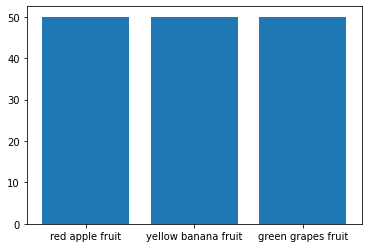

time: 169 ms (started: 2021-06-26 17:07:57 +00:00)


In [10]:
unique,count = np.unique(target , return_counts=True) #unique stores the values, count stores their counts
plt.bar(CATEGORIES,count)
print(count)

In [11]:
#Split into Training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 176 ms (started: 2021-06-26 17:08:52 +00:00)


# Hyper Parameter Tuning GridSearchCV


In [12]:
from sklearn.model_selection import GridSearchCV

time: 8.34 ms (started: 2021-06-26 17:08:53 +00:00)


# Using SVM model

In [13]:
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
                  ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 16s (started: 2021-06-26 17:08:55 +00:00)


In [14]:
y_pred=clf.predict(x_test)
y_pred

array([2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2,
       1])

time: 462 ms (started: 2021-06-26 17:14:11 +00:00)


#Testing Accuracy of SVM model

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6222222222222222

time: 4.58 ms (started: 2021-06-26 17:14:11 +00:00)


In [16]:
print(confusion_matrix(y_pred,y_test))

[[ 6  2  2]
 [ 1 11  3]
 [ 5  4 11]]
time: 4.79 ms (started: 2021-06-26 17:14:11 +00:00)


# Using Pickle to save the model

In [17]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 55.9 ms (started: 2021-06-26 17:16:09 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 31.8 ms (started: 2021-06-26 17:16:10 +00:00)


# Predicting on Input Data

Enter your URL: https://image.shutterstock.com/image-photo/red-apple-fruit-leaf-isolated-260nw-203589940.jpg
(280, 240, 3)
Predicted Output: red apple fruit


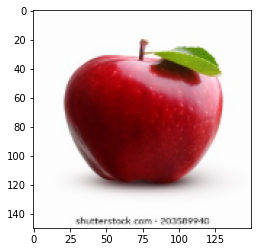

time: 5.43 s (started: 2021-06-26 17:16:58 +00:00)


In [20]:
flat_data=[]
url=input('Enter your URL: ')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output: {y_out}')